# Generating Models

In [1]:
from vae.dirichlet import SamplingReparamLaplace, SamplingReparamKL, DirVae
from vae.gauss import GaussVae

from keras.datasets import mnist

import numpy as np

Using TensorFlow backend.


In [2]:
def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    return x_train, x_test, y_train, y_test

In [3]:
x_train, x_test, y_train, y_test = get_data()

# Init Models

In [4]:
from keras import callbacks as cb

cb_earlystop = cb.EarlyStopping(
    monitor='val_loss', min_delta=1, patience=3, verbose=0, mode='auto')

models = {}

In [5]:
len(x_train[0])

784

In [6]:
x_train = x_train[:,:4]
x_test = x_test[:,:4]

In [7]:
len(x_train)

60000

In [8]:
o_dim = 4 #original_dim
h_dim = 4 #encoder-decoder_widths
c_dim = 2 #latent_dim

In [9]:
c = lambda _: [
    cb_earlystop, 
    cb.CSVLogger("./log_results/log.{}.csv".format(_))]
model_types = ["dirichlet_laplace", "dirichlet_kl", "logit", "normal"]

In [10]:
models["dirichlet_laplace"] = DirVae(
    reparam=SamplingReparamLaplace, 
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,)
#     log_alpha=True,
#     dropout=True)

In [11]:
models["dirichlet_kl"] = DirVae(
    reparam=SamplingReparamLaplace, 
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,)
#     log_alpha=True,
#     dropout=True)

In [12]:
models["logit"] = GaussVae(
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,
    logit=True)

In [13]:
models["normal"] = GaussVae(
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,
    logit=False)

In [14]:
model_types

['dirichlet_laplace', 'dirichlet_kl', 'logit', 'normal']

In [19]:
models[model_types[1]].fit(x_train, x_test,
                       callbacks=c(model_types[1]), 
                       nb_epoch=30)

/mnt/04_dirichlet_vae/Notebook/dirichlet-vae/vae/dirichlet.py:210: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  **kwargs))


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 101us/step - loss: -0.8446 - val_loss: -1.1433
Epoch 2/30
60000/60000 [==============================] - 5s 90us/step - loss: -1.1442 - val_loss: -1.1446
Epoch 3/30
60000/60000 [==============================] - 5s 90us/step - loss: -1.1447 - val_loss: -1.1447
Epoch 4/30
60000/60000 [==============================] - 5s 89us/step - loss: -1.1447 - val_loss: -1.1447


In [20]:
from vae.evaluate import MnistMetrics

%matplotlib inline

In [21]:
m = MnistMetrics(models[model_types[1]], x_test, y_test)

In [22]:
m.plot_bar()

ValueError: Layout of 5x2 must be larger than required size 10000

<Figure size 720x720 with 0 Axes>

# Plot Data

In [23]:
type = "dirichlet_kl"
type

'dirichlet_kl'

In [24]:
m = MnistMetrics(models[type],  x_test, y_test)

ValueError: Error when checking input: expected input_7 to have shape (2,) but got array with shape (10000,)

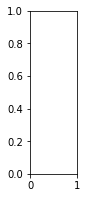

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 3))
m.plot_mean_digits()
plt.savefig("log_results/" + type + "digits.png")

In [27]:
plot_bars(L)
plt.savefig("log_results/" + type + "bars.png")

NameError: name 'plot_bars' is not defined

ValueError: cannot reshape array of size 4 into shape (28,28)

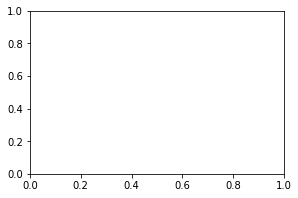

In [28]:
plt.figure(figsize=(10, 3))
m.plot_onehots()
plt.savefig("log_results/" + type + "hots.png")

In [ ]:
plt.figure(figsize=(10, 3))
m.plot_transition("label_0", "label_9")
plt.savefig("log_results/" + type + "0-9.png")

In [ ]:
plt.figure(figsize=(10, 3))
m.plot_transition("label_4", "label_6")
plt.savefig("log_results/" + type + "4-6.png")

In [ ]:
plt.figure(figsize=(10, 3))
m.plot_transition("label_3", "label_8")
plt.savefig("log_results/" + type + "3-8.png")

In [ ]:
len(x_test)

In [ ]:
len(x_train[:16*100*3,:])